Minpts: 3


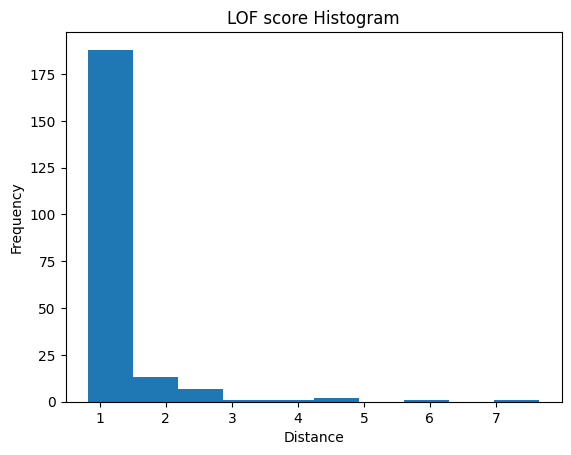

Frequency:  [188  13   7   1   1   2   0   1   0   1]
Edges:  [0.82339673 1.50655571 2.18971469 2.87287367 3.55603265 4.23919163
 4.92235061 5.60550959 6.28866857 6.97182754 7.65498652]
Otsu's threshold for LOF: 2.872873669903882


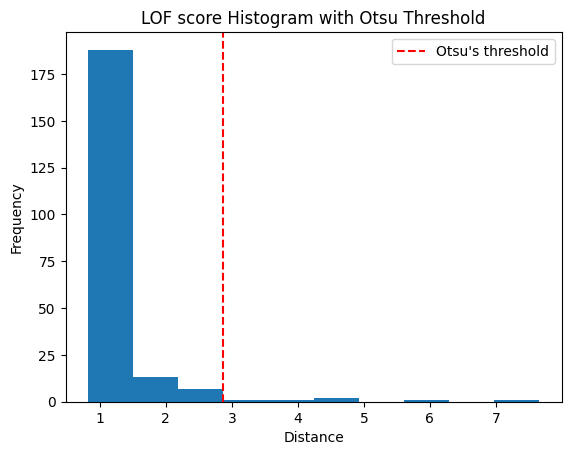

Inliers for LOFs:  208
Outliers for LOFs:  6


In [13]:
#Q1_LOF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('glass.csv')
data = []
for i in df.values:
    data.append(i[0:-1])
data = np.array(data)
class LOF:
    def manhattan_distance(p1, p2):
        return np.sum(np.abs(p1 - p2))
    def k_nearest_neighbor(dataset, query_point, k):
        distances = np.sum(np.abs(dataset - query_point), axis=1)
        sorted_distances_indices = np.argsort(distances)
        k_nearest_indices = sorted_distances_indices[1:k+1] # Exclude the query point itself
        k_nearest_neighbors = dataset[k_nearest_indices]
        kth_nearest_index = sorted_distances_indices[k]
        return k_nearest_neighbors, kth_nearest_index
    def kth_nearest_distance(dataset, p, k):
        x,y = LOF.k_nearest_neighbor(dataset, p, k)
        d = dataset[y]
        return LOF.manhattan_distance(p,d)
    def Reachability_distance(p1,p2,k):
        d1 = LOF.manhattan_distance(p1,p2)
        d2 = LOF.kth_nearest_distance(data,p2,k)
        return max(d1,d2)
    def Local_reachability_distance(p,data,k):
        x,y = LOF.k_nearest_neighbor(data,p,k)
        s=0
        for i in x:
            s+=LOF.Reachability_distance(p,i,k)
        t = s/len(x)
        return 1/t
    def LOF_distance(point,dataset,k):
        x,y = LOF.k_nearest_neighbor(dataset,point,k)
        a=0
        for i in x:
            a+=LOF.Local_reachability_distance(i,dataset,k)
        b = LOF.Local_reachability_distance(point,dataset,k)
        return a/(len(x)*b)
LOFs = []
minpts = int(input("Minpts: "))
for i in data:
    LOFs.append(LOF.LOF_distance(i,data,minpts))
# print(LOFs)
plt.hist(LOFs, bins=10)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('LOF score Histogram')
plt.show()

hist, bin_edges = np.histogram(LOFs, bins=10)
print("Frequency: ",hist)
print("Edges: ",bin_edges)

# Calculate the total number of distances
total = len(LOFs)

# Initialize variables for the maximum variance and the threshold value
def Otsu_threshold(hist, bin_edges):
    max_variance = 19919191
    threshold = 0
    for i in range(1, 10):
        # Calculate the weights for the two classes (foreground and background)
        w0 = np.sum(hist[:i]) / total
        w1 = np.sum(hist[i:]) / total
        
        # Calculate the mean values for the two classes
        u0=0
        u1=0
        sig0=0
        sig1=0
        for j in range(i):
            u0 += hist[j]*j
        u0 /= sum(hist[:i])

        for j in range(i, 10):
            u1 += hist[j]*j
        u1 /= sum(hist[i:])
        
        for j in range(i):
            sig0+=((j-u0)**2)*hist[j]
        sig0/=sum(hist[:i])
        for j in range(i,10):
            sig1+=((j-u1)**2)*hist[j]
        sig1/=sum(hist[i:])
        variance = w0*sig0 + w1*sig1
        
        if variance < max_variance:
            max_variance = variance
            threshold = bin_edges[i]
    return threshold
# Print the threshold value
threshold = Otsu_threshold(hist, bin_edges)
print("Otsu's threshold for LOF:", threshold)

# Plot the histogram and the threshold value
plt.hist(LOFs, bins=10)
plt.axvline(x=threshold, color='r', linestyle='--', label="Otsu's threshold")
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('LOF score Histogram with Otsu Threshold')
plt.legend()
plt.show()

In1=[]
out1=[]
for i in LOFs:
    if(i<threshold):
        In1.append(i)
    else:
        out1.append(i)
print("Inliers for LOFs: ",len(In1))
print("Outliers for LOFs: ",len(out1))


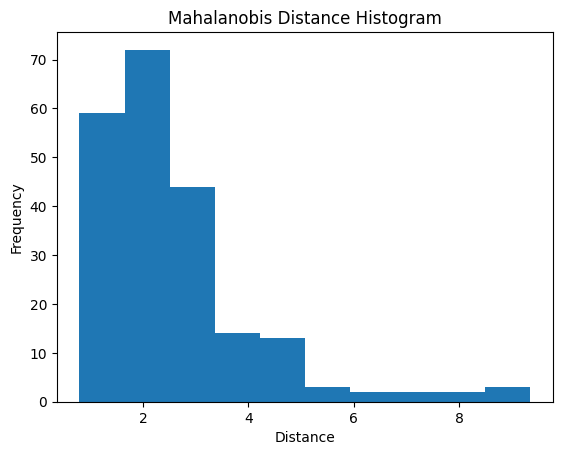

Frequency:  [59 72 44 14 13  3  2  2  2  3]
Edges:  [0.79294364 1.64912498 2.50530631 3.36148764 4.21766898 5.07385031
 5.93003165 6.78621298 7.64239431 8.49857565 9.35475698]
Otsu's threshold: 3.361487644151791


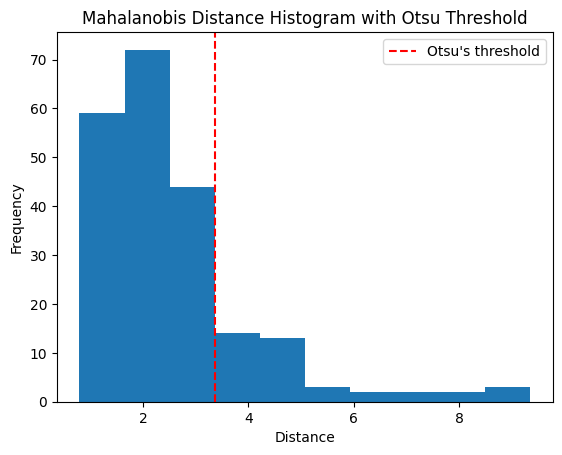

Inliers:  175
Outliers:  39


In [14]:
#Q1_Mahalanobis
import pandas as pd
import numpy as np
import math
# from pprint import pprint
import matplotlib.pyplot as plt
df = pd.read_csv('glass.csv')
# print(df)
data = []
for i in df.values:
    data.append(i[0:-1])
data = np.array(data)
# print(data)
class Mahalanobis:
    def covariance(X):
        return np.cov(X.T)
    def m_distance(p,X):
        m = np.mean(X.T,axis=1)
        x1 = np.array(p-m).reshape(9,1)
        sigma = Mahalanobis.covariance(X)
        d = math.sqrt(np.dot(np.dot(x1.T,np.linalg.inv(sigma)),x1))
        return d

distances = []

for i in data:
    distances.append(Mahalanobis.m_distance(i,data))
plt.hist(distances, bins=10)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Mahalanobis Distance Histogram')
plt.show()

hist, bin_edges = np.histogram(distances, bins=10)
print("Frequency: ",hist)
print("Edges: ",bin_edges)

# Calculate the total number of distances
total = len(distances)
max_variance = 19919191
threshold = 0

# Iterate over each bin
for i in range(1, 10):
    
    # Calculate the weights for the two classes (foreground and background)
    w0 = np.sum(hist[:i]) / total
    w1 = np.sum(hist[i:]) / total
    
    # Calculate the mean values for the two classes
    u0=0
    u1=0
    sig0=0
    sig1=0
    for j in range(i):
        u0 += hist[j]*j
    u0 /= sum(hist[:i])

    for j in range(i, 10):
        u1 += hist[j]*j
    u1 /= sum(hist[i:])
    
    for j in range(i):
        sig0+=((j-u0)**2)*hist[j]
    sig0/=sum(hist[:i])
    for j in range(i,10):
        sig1+=((j-u1)**2)*hist[j]
    sig1/=sum(hist[i:])
    variance = w0*sig0 + w1*sig1
    
    # # Check if the variance is greater than the current maximum variance
    if variance < max_variance:
        max_variance = variance
        threshold = bin_edges[i]
        
# Print the threshold value
print("Otsu's threshold:", threshold)

# Plot the histogram and the threshold value
plt.hist(distances, bins=10)
plt.axvline(x=threshold, color='r', linestyle='--', label="Otsu's threshold")
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Mahalanobis Distance Histogram with Otsu Threshold')
plt.legend()
plt.show()

In=[]
out=[]
for i in distances:
    if(i<threshold):
        In.append(i)
    else:
        out.append(i)
print("Inliers: ",len(In))
print("Outliers: ",len(out))

Iteration 0, Cost : 0.6624663247036892
Iteration 100, Cost : 0.35692345494394434
Iteration 200, Cost : 0.34319597997698364
Iteration 300, Cost : 0.33930659796510027
Iteration 400, Cost : 0.33776441107339733
Iteration 500, Cost : 0.3370436051292646
Iteration 600, Cost : 0.33667400438023193
Iteration 700, Cost : 0.33647392439219903
Iteration 800, Cost : 0.3363620434160213
Iteration 900, Cost : 0.33629823032986367
Accuracy: 78.57142857142857 %


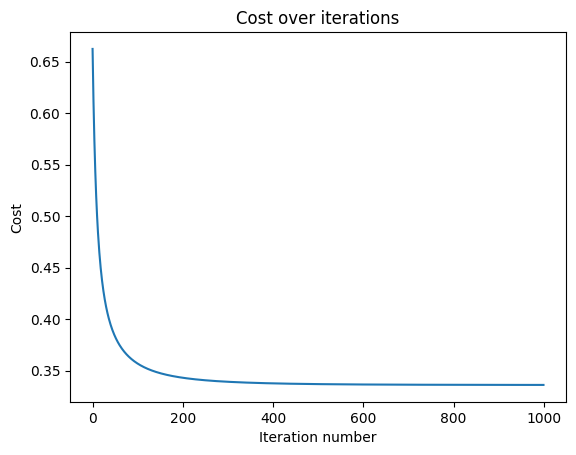

In [15]:
#Q2_logistic_regression_implementation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


class LogisticRegression:
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def compute_cost(X, y, w):
        z = np.dot(X, w)
        y_pred = LogisticRegression.sigmoid(z)
        eps = 1e-8
        cost = -np.mean(y * np.log(y_pred+eps) + (1-y) * np.log(1-y_pred+eps))
        return cost

    @staticmethod
    def logistic_regression(X, y, learning_rate, num_iterations):
        # Normalize features
        scaler = StandardScaler()
        X_norm = scaler.fit_transform(X)
        
        # Initialize weights to zero
        w = np.zeros(X_norm.shape[1])
        costs = []
        
        # Gradient descent
        for i in range(num_iterations):
            z = np.dot(X_norm, w)
            y_pred = LogisticRegression.sigmoid(z)
            dw = (1/X_norm.shape[0]) * np.dot(X_norm.T, (y_pred - y))
            w -= learning_rate * dw
            cost = LogisticRegression.compute_cost(X_norm, y, w)
            costs.append(cost)
            if i % 100 == 0:
                print(f'Iteration {i}, Cost : {cost}')
            
        return w, costs

# create a LabelEncoder object
le = LabelEncoder()

# load data
df = pd.read_csv('Heart.csv')

# preprocess data
dataX = []
for i in df.values:
    if i[-3] in [0, 1, 2]:
        dataX.append(i[1:-1])
dataX = np.array(dataX)
dataY = np.array([1 if i[-1] == 'Yes' else 0 for i in df.values if i[-3] in [0, 1, 2]])
dataX[:, 2] = le.fit_transform(dataX[:, 2])
dataX[:, -1] = le.fit_transform(dataX[:, -1])
dataX = np.hstack((np.ones((dataX.shape[0], 1)), dataX))

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=0)
# train logistic regression model
learning_rate = 0.1
num_iterations = 1000
w, costs = LogisticRegression.logistic_regression(x_train, y_train, learning_rate, num_iterations)

# make predictions on testing data
z = np.dot(StandardScaler().fit_transform(x_test), w)
y_pred = LogisticRegression.sigmoid(z)
y_pred_class = np.round(y_pred)

# evaluate model
accuracy = np.mean(y_pred_class == y_test)
print('Accuracy:', accuracy*100,"%")


plt.plot(costs)
plt.title("Cost over iterations")
plt.xlabel("Iteration number")
plt.ylabel("Cost")
plt.show()

In [16]:
#Q2_FDA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = pd.read_csv('Heart.csv')
t = np.array(df)
dataX = []
for i in t:
    if i[-3] in [0, 1, 2]:
        dataX.append(i[1:])
dataX = np.array(dataX)
dataY = np.array([1 if i[-1] == 'Yes' else 0 for i in dataX])

#Encoding the data(replacing strings with numerical values)
dataX[:, 2] = le.fit_transform(dataX[:, 2])
dataX[:, -2] = le.fit_transform(dataX[:, -2])
dataX[:, len(dataX[0])-1] = le.fit_transform(dataX[:, len(dataX[0])-1])

#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=42)

#Implementing FDA from scratch
data_zero = []
data_one = []
for i in X_train:
    if i[-1]==0:
        data_zero.append(i[0:len(i)-1])
    else:
        data_one.append(i[0:len(i)-1])
data_zero = np.array(data_zero)
data_one = np.array(data_one)

mean0 = np.mean(data_zero.T,axis=1)
mean1 = np.mean(data_one.T,axis=1)

S0 = np.zeros((13, 13), dtype=np.float64)
for i in data_zero:
    a = np.array(i-mean0).reshape(13,1)
    S0+=np.dot(a,a.T).astype(np.float64)
S1 = np.zeros((13, 13), dtype=np.float64)
for i in data_one:
    a = np.array(i-mean1).reshape(13,1)
    S1+=np.dot(a,a.T).astype(np.float64)
n0 = len(data_zero)
n1 = len(data_one)
S0/=n0-1
S1/=n1-1

w = np.dot(np.linalg.inv(n0*S0 + n1*S1),mean0-mean1)
# print("Direction :: ",w)

#Finding the projected data
projected_data_train = np.array(np.dot(X_train[:,:-1],w.T)).reshape(-1,1)
projected_data_train  = np.hstack((np.ones((projected_data_train.shape[0], 1)), projected_data_train))
projected_data_test = np.array(np.dot(X_test[:,:-1],w.T)).reshape(-1,1)
projected_data_test  = np.hstack((np.ones((projected_data_test.shape[0], 1)), projected_data_test))

#implementing Logistic regression from scratch
max_iter = 50000
learning_rate = 0.1
weight = np.zeros(2).reshape(-1,1)
def sigmoid(x):
    return 1/(1+np.exp(-x))
projected_data_train = np.array(projected_data_train,dtype=np.float64)
for _ in range(max_iter):
    p = sigmoid(np.dot(projected_data_train, weight))
    weight = weight - (learning_rate/(n1+n0))*np.dot(projected_data_train.T, (p-y_train.reshape(-1,1)))
print("Weights: ",weight)


# Predicting Outputs
t = np.dot(projected_data_test,weight)
y_pred = []
for i in t:
    y_pred.append(sigmoid(i[0]))
d = []
for i in y_pred:
    if(i<0.5):
        d.append(0)
    else:
        d.append(1)
d = np.array(d)

accuracy = np.mean(d == y_test)
print("Accuracy with FDA: ",accuracy*100,"%")

Weights:  [[ -0.63491264]
 [-23.56888094]]
Accuracy with FDA:  85.71428571428571 %


In [17]:
#Q2_PCA+FDA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df = pd.read_csv('Heart.csv')
t = np.array(df)
dataX = []
for i in t:
    if i[-3] in [0, 1, 2]:
        dataX.append(i[1:])
dataX = np.array(dataX)
# Encoding labels
dataY = np.array([1 if i[-1] == 'Yes' else 0 for i in dataX])

# Encoding the data
dataX[:, 2] = le.fit_transform(dataX[:, 2])
dataX[:, -2] = le.fit_transform(dataX[:, -2])
dataX[:, len(dataX[0]) - 1] = le.fit_transform(dataX[:, len(dataX[0]) - 1])

scaler = StandardScaler()
dataX_scaled = scaler.fit_transform(dataX[:, :-1])

pca = PCA(n_components=5)
#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(dataX_scaled, dataY, test_size=0.3, random_state=100)

#Applying PCA
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

zeros = X_pca_train[y_train == 0]
ones = X_pca_train[y_train == 1]

#implementing FDA from scratch
mean0 = np.mean(zeros, axis=0)
mean1 = np.mean(ones, axis=0)

S0 = np.zeros((5, 5), dtype=np.float64)
# print(S0.shape)
for i in zeros:
    a = np.array(i-mean0).reshape(5,1)
    S0+=np.dot(a,a.T).astype(np.float64)
S1 = np.zeros((5, 5), dtype=np.float64)
for i in ones:
    a = np.array(i-mean1).reshape(5,1)
    S1+=np.dot(a,a.T).astype(np.float64)
n0 = len(zeros)
n1 = len(ones)
S0/=n0-1
S1/=n1-1
w = np.dot(np.linalg.inv(n0*S0+n1*S1), mean0 - mean1)

# Finding proected data
projected_data_train = np.dot(X_pca_train, w)
projected_data_test = np.dot(X_pca_test, w)

#implementing Logistic regression
def sigmoid(x): return 1 / (1 + np.exp(-x))

max_iter = 500000
learning_rate = 0.1
weight = np.zeros(1)

for _ in range(max_iter):
    p = sigmoid(projected_data_train * weight)
    weight = weight - (learning_rate / len(y_train)) * np.dot(projected_data_train, (p - y_train))


y_pred = sigmoid(projected_data_test * weight)

y_pred_label = np.where(y_pred < 0.5, 0, 1)

accuracy = np.mean(y_pred_label == y_test)
print("Accuracy with PCA+FDA: ", accuracy * 100, "%")

Accuracy with PCA+FDA:  80.95238095238095 %


In [18]:
#Q3_Linear Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Load the dataset
df = pd.read_csv('Real estate.csv')

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare the training data
train_data = train_df.values
train_features = train_data[:, 1:-1]
train_labels = train_data[:, -1]

# Add intercept term to the features
train_X = np.concatenate([np.ones((train_features.shape[0], 1)), train_features], axis=1)

# Calculate the theta using the normal equation
theta = np.dot(np.linalg.inv(np.dot(train_X.T, train_X)), np.dot(train_X.T, train_labels)).reshape(-1, 1)
test_data = test_df.values
test_features = test_data[:, 1:-1]
test_labels = test_data[:, -1]

test_X = np.concatenate([np.ones((test_features.shape[0], 1)), test_features], axis=1)
predicted_output = np.dot(test_X, theta)
# Print the final equation
print("Final equation for Linear regression is:")
print(f"Y = {theta[0][0]:.4f} + ", end="")
for i in range(1, len(theta)):
    if i == len(theta) - 1:
        print(f"x{i}*{theta[i][0]:.4f} ", end='')
    else:
        print(f"x{i}*{theta[i][0]:.4f} + ", end='')
RSS = 0
for i in range(len(predicted_output)):
    RSS+=(test_labels[i]-predicted_output[i])**2
print("\nRSS = ",float(RSS))
RMSE = RSS/len(predicted_output)
print("RMSE: ",float(RMSE**0.5))
TSS=0
y_m = np.mean(predicted_output)
for i in test_labels:
    TSS+=(i-y_m)**2
print("TSS = ",TSS)
R_squared = 1-RSS/TSS
print("R_squared = ",float(R_squared))



# The limitations of the normal equation approach for linear regression are:

# It can be computationally expensive for large datasets.
# It can overfit the data if the input features are highly correlated or if there are too many features relative to the number of examples.
# It may be numerically unstable if the input features are linearly dependent.
# It can only model linear relationships between variables.
# It is sensitive to outliers, which can lead to overfitting and poor generalization to new data.

Final equation for Linear regression is:
Y = -13044.2328 + x1*5.4407 + x2*-0.2708 + x3*-0.0048 + x4*1.0914 + x5*229.0431 + x6*-29.4926 
RSS =  4440.966428158635
RMSE:  7.3147535581432335
TSS =  13925.32280635101
R_squared =  0.6810870031585038


In [19]:
#Q4_LDA
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X = iris.data
labels = iris.target
data, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=75)

unique_labels, label_indices = np.unique(y_train, return_inverse=True)
grouped_data = [data[label_indices == i] for i in range(len(unique_labels))]

means = []
for i in grouped_data:
    means.append(list(np.mean(i.T,axis=1)))

M = np.mean(data.T,axis=1)

class LDA:
    def in_scatter_matrix(j):
        x = np.mean(j.T, axis=1)
        s = np.zeros((len(j[0]), len(j[0])))
        for i in j:
            a = np.array(i-x).reshape(len(j[0]),1)
            s += np.dot(a,a.T)
        return s

    def between_scatter_matrix(d):
        M = np.mean(data.T,axis=1)
        M.reshape(4,1)
        t = np.zeros((len(data[0]), len(data[0])))
        for j in d:
            m = np.mean(j.T,axis=1).reshape(4,1)
            a = m-M.reshape(4,1)
            t += len(j) * np.dot(a,a.T)
        return t

Sw = np.zeros((len(data[0]), len(data[0])))
for i in grouped_data:
    x = LDA.in_scatter_matrix(i)
    Sw += x
Sb = LDA.between_scatter_matrix(grouped_data)
print("Sw (Within Class scatter Matrix) is: \n",Sw)
print("Sb (Between Class scatter Matrix) is: \n",Sb)
k =  int(input("K: "))
Sw_inv = np.linalg.inv(Sw)
M = np.dot(Sw_inv, Sb)
eigenvalues, eigenvectors = np.linalg.eigh(M)
idx = np.argsort(eigenvalues)[::-1][:k] # Get the indices of the top k eigenvalues
topk_eigenvectors = np.real_if_close(eigenvectors[:,idx]) # Convert the eigenvectors to real values
# print(topk_eigenvectors)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with only kNN:", accuracy*100,"%")


X_train = np.dot(data, topk_eigenvectors)
# print(X_train)
eigenvalues, eigenvectors = np.linalg.eigh(M)
X_test = np.dot(X_test, topk_eigenvectors)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print("Accuracy with LDA and kNN:", accuracy*100,"%")

Sw (Within Class scatter Matrix) is: 
 [[28.95875 10.1615  18.93575  5.2355 ]
 [10.1615  13.97475  5.6525   3.8715 ]
 [18.93575  5.6525  21.74075  5.6135 ]
 [ 5.2355   3.8715   5.6135   4.87075]]
Sb (Between Class scatter Matrix) is: 
 [[ 48.27116667 -16.90575    127.6095      55.83158333]
 [-16.90575     10.9985     -49.65475    -20.11025   ]
 [127.6095     -49.65475    342.1985     148.14025   ]
 [ 55.83158333 -20.11025    148.14025     64.63716667]]
K: 4
Accuracy with only kNN: 100.0 %
Accuracy with LDA and kNN: 100.0 %


In [20]:
#Q5_Logistic regression_for Multiclass_classification_problem
#We can apply logistic regression on multi-class classification problem 
# by using 1 vs all approach, for each label we will treat that label as
# 0 and others as 1 and we will do this for each label and we would calculate 
# Probabilities on all new labels generated and then predict the labels
# according to the calculated probabilities
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data
y = iris.target
#creating labels 1 vs all
y1 = [] #{0,{1,2}}
y2 = [] #{1,{0,2}}
y3 = [] #{2,{0,1}}
for i in y:
    if(i==0):
        y1.append(0)
    else:
        y1.append(1)
for i in y:
    if(i==1):
        y2.append(0)
    else:
        y2.append(1)
for i in y:
    if(i==2):
        y3.append(0)
    else:
        y3.append(1)
y1 = np.array(y1)
#splitting data into training and testing
X_train, X_test, y_train_1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y_train_2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train, X_test, y_train_3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_set = list(set(y))
# print(label_set)
class LogisticRegression:
    def sigmoid(x):
        return 1/(1+np.exp(-x))
    def gradient_descent(X,y,n,l):
        weight = np.zeros(5).reshape(-1,1)
        for _ in range(n):
            p = LogisticRegression.sigmoid(np.dot(X_train, weight))
            weight = weight - (l/(len(X)+len(y)))*np.dot(X.T, (p-np.array(y).reshape(-1,1)))
        return weight
learning_rate = 0.1
num_iterations = 1000
#Adding intercept term in training and testing data
X_train  = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test  = np.hstack((np.ones((X_test.shape[0], 1)), X_test))


# Predicting Output from y1
w = LogisticRegression.gradient_descent(X_train,y_train_1,num_iterations,learning_rate)
t = np.dot(X_test,w)
y_pred = []
for i in t:
    y_pred.append(LogisticRegression.sigmoid(i[0]))
p = []
for i in y_pred:
    if(i<0.5):
        p.append(0)
    else:
        p.append(1)
d = np.array(y_pred)
accuracy = np.mean(p == np.array(y_test1))
print("Accuracy with {0,{1,2}}: ",accuracy*100,"%")

# Predicting Output from y2
w1 = LogisticRegression.gradient_descent(X_train,y_train_2,num_iterations,learning_rate)
t1 = np.dot(X_test,w1)
y_pred1 = []
for i in t1:
    y_pred1.append(LogisticRegression.sigmoid(i[0]))
p1 = []
for i in y_pred1:
    if(i<0.5):
        p1.append(0)
    else:
        p1.append(1)
d1 = np.array(y_pred1)
accuracy1 = np.mean(p1 == np.array(y_test2))
print("Accuracy with {1,{0,2}}: ",accuracy1*100,"%")


# Predicting Output from y3
w2 = LogisticRegression.gradient_descent(X_train,y_train_3,num_iterations,learning_rate)
t2 = np.dot(X_test,w2)
y_pred2 = []
for i in t2:
    y_pred2.append(LogisticRegression.sigmoid(i[0]))

p3 = []
for i in y_pred2:
    if(i<0.5):
        p3.append(0)
    else:
        p3.append(1)
d2 = np.array(y_pred2)

accuracy2 = np.mean(p3 == np.array(y_test3))
print("Accuracy with {2,{0,1}}: ",accuracy2*100,"%")

final_labels = []
for i in range(len(y_test)):
    x = min([d[i],d1[i],d2[i]])
    if(x==d[i]):
        final_labels.append(0)
    elif x==d1[i]:
        final_labels.append(1)
    else:
        final_labels.append(2)
print("Predicted labels: ",np.array(final_labels))
print("Actual Labels: ",y_test)
accuracy = np.mean(np.array(final_labels)==y_test)
print("Final Accuracy: ",accuracy*100,"%")


# logistic regression provides better result than LDA in Q4
# beacause in Q4 if we take 2 top-eigenvectors or change 
# hyperparameters thn accuracy dropes
# to 96.6667% however in logistic regression accuracy remains 100% 
# even for varying hyperparameters it predicts very accurate labels.

Accuracy with {0,{1,2}}:  100.0 %
Accuracy with {1,{0,2}}:  76.66666666666667 %
Accuracy with {2,{0,1}}:  100.0 %
Predicted labels:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual Labels:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Final Accuracy:  100.0 %
